In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
customer = pd.read_csv('data/customer_dim.csv', encoding='latin1')
fact = pd.read_csv('data/fact_table.csv', encoding='latin1')
item = pd.read_csv('data/item_dim.csv', encoding='latin1')
store = pd.read_csv('data/store_dim.csv', encoding='latin1')
time = pd.read_csv('data/time_dim.csv', encoding='latin1')
trans = pd.read_csv('data/trans_dim.csv', encoding='latin1')

In [5]:
customer

,coustomer_key,name,contact_no,nid
0,C000001,sumit,8801920345851,7505075708899
1,C000002,tammanne,8801817069329,1977731324842
2,C000003,kailash kumar,8801663795774,3769494056318
3,C000004,bhagwati prasad,8801533627961,9378834712725
4,C000005,ajay,8801943715786,3540815556323
...,...,...,...,...
9186,C009187,smt radha,8801563029753,1057824928189
9187,C009188,tulsi sharma,8801794982266,7970880905205
9188,C009189,madhubala,8801890032435,3101930298150
9189,C009190,pintu devi,8801563290767,7234328323528


In [6]:
fact

,payment_key,coustomer_key,time_key,item_key,store_key,quantity,unit,unit_price,total_price
0,P026,C004510,T049189,I00177,S00307,1,ct,35.0,35.0
1,P022,C008967,T041209,I00248,S00595,1,rolls,26.0,26.0
2,P030,C007261,T03633,I00195,S00496,8,ct,12.5,100.0
3,P032,C007048,T084631,I00131,S0086,8,ct,14.0,112.0
4,P014,C006430,T071276,I00050,S00488,8,cans,8.0,64.0
...,...,...,...,...,...,...,...,...,...
999995,P010,C003726,T09247,I00063,S00502,5,cans,40.0,200.0
999996,P021,C002581,T023483,I00252,S00225,1,ct,11.0,11.0
999997,P035,C006133,T039372,I00119,S00555,7,ct,53.0,371.0
999998,P031,C008735,T097975,I00257,S00440,2,ct,21.0,42.0


In [7]:
item

,item_key,item_name,desc,unit_price,man_country,supplier,unit
0,I00001,A&W Root Beer - 12 oz cans,a. Beverage - Soda,11.50,Netherlands,Bolsius Boxmeer,cans
1,I00002,A&W Root Beer Diet - 12 oz cans,a. Beverage - Soda,6.75,poland,CHROMADURLIN S.A.S,cans
2,I00003,Barq's Root Beer - 12 oz cans,a. Beverage - Soda,6.75,Bangladesh,DENIMACH LTD,cans
3,I00004,Cherry Coke 12oz,a. Beverage - Soda,6.75,Netherlands,Bolsius Boxmeer,cans
4,I00005,Cherry Coke Zero 12 pack,a. Beverage - Soda,6.75,Finland,HARDFORD AB,cans
...,...,...,...,...,...,...,...
259,I00260,Napkins Square Lunch,Kitchen Supplies,15.00,Cambodia,NINGBO SEDUNO IMP & EXP CO.LTD,ct
260,I00261,POM 2 ply paper towels,Kitchen Supplies,33.00,Lithuania,BIGSO AB,ct
261,I00262,Strong Everyday Napkins,Kitchen Supplies,14.00,Netherlands,Bolsius Boxmeer,ct
262,I00263,Advil 2 pill packets,Medicine,14.00,Lithuania,BIGSO AB,Ct


In [8]:
store

,store_key,division,district,upazila
0,S0001,SYLHET,HABIGANJ,AJMIRIGANJ
1,S0002,SYLHET,HABIGANJ,BAHUBAL
2,S0003,SYLHET,HABIGANJ,BANIACHONG
3,S0004,SYLHET,HABIGANJ,CHUNARUGHAT
4,S0005,SYLHET,HABIGANJ,HABIGANJ SADAR
...,...,...,...,...
721,S00722,BARISAL,BARISAL,HIZLA
722,S00723,BARISAL,BARISAL,BARISAL SADAR (KOTWALI)
723,S00724,BARISAL,BARISAL,MEHENDIGANJ
724,S00725,BARISAL,BARISAL,MULADI


In [9]:
store['district'].value_counts()

district
DHAKA         162
CHITTAGONG     50
KHULNA         28
RAJSHAHI       26
BARISAL        20
             ... 
MADARIPUR       4
MAGURA          4
JHALOKATI       4
MEHERPUR        3
NARAIL          3
Name: count, Length: 64, dtype: int64

In [10]:
time

,time_key,date,hour,day,week,month,quarter,year
0,T00001,20-05-2017 14:56,14,20,3rd Week,5,Q2,2017
1,T00002,30-01-2015 22:14,22,30,4th Week,1,Q1,2015
2,T00003,14-03-2020 02:34,2,14,2nd Week,3,Q1,2020
3,T00004,27-04-2018 12:19,12,27,4th Week,4,Q2,2018
4,T00005,14-04-2018 10:43,10,14,2nd Week,4,Q2,2018
...,...,...,...,...,...,...,...,...
99994,T099995,04-01-2015 17:22,17,4,1st Week,1,Q1,2015
99995,T099996,17-01-2015 21:09,21,17,3rd Week,1,Q1,2015
99996,T099997,23-01-2020 14:42,14,23,4th Week,1,Q1,2020
99997,T099998,31-10-2015 13:52,13,31,4th Week,10,Q4,2015


In [11]:
trans

,payment_key,trans_type,bank_name
0,P001,cash,NaN
1,P002,card,AB Bank Limited
2,P003,card,Bangladesh Commerce Bank Limited
3,P004,card,Bank Asia Limited
4,P005,card,BRAC Bank Limited
5,P006,card,Citizens Bank Limited
6,P007,card,City Bank Limited
7,P008,card,Community Bank Bangladesh Limited
8,P009,card,Dhaka Bank Limited
9,P010,card,Dutch-Bangla Bank Limited


In [29]:
fact_item = pd.merge(fact, item[['item_key', 'item_name', 'desc']], on='item_key', how='left')
fact_item_store = pd.merge(fact_item, store[['store_key', 'division', 'district']], on='store_key', how='left')
final_fact = pd.merge(fact_item_store, time[['time_key', 'hour', 'month', 'year','quarter','date']], on='time_key', how='left')
final_fact

,payment_key,coustomer_key,time_key,item_key,store_key,quantity,unit,unit_price,total_price,item_name,desc,division,district,hour,month,year,quarter,date
0,P026,C004510,T049189,I00177,S00307,1,ct,35.0,35.0,M&M Peanut Candy 1.7 oz,Food - Chocolate,DHAKA,JAMALPUR,17,4,2016,Q2,26-04-2016 17:13
1,P022,C008967,T041209,I00248,S00595,1,rolls,26.0,26.0,Charmin Ultra Bath Tissue,Kitchen Supplies,DHAKA,DHAKA,19,6,2018,Q2,11-06-2018 19:08
2,P030,C007261,T03633,I00195,S00496,8,ct,12.5,100.0,Dole Fruit in Gel Cups 4.3 oz,Food - Healthy,CHITTAGONG,NOAKHALI,8,11,2016,Q4,19-11-2016 08:19
3,P032,C007048,T084631,I00131,S0086,8,ct,14.0,112.0,Paper Bowls 20 oz Ultra Strong,Dishware - Bowls,RANGPUR,RANGPUR,6,2,2020,Q1,01-02-2020 06:00
4,P014,C006430,T071276,I00050,S00488,8,cans,8.0,64.0,Waterloo Sparkling Watermelon 12oz,a. Beverage Sparkling Water,CHITTAGONG,KHAGRACHHARI,2,7,2014,Q3,15-07-2014 02:58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,P010,C003726,T09247,I00063,S00502,5,cans,40.0,200.0,Red Bull 8.4 oz,Beverage - Energy/Protein,CHITTAGONG,NOAKHALI,23,7,2020,Q3,22-07-2020 23:42
999996,P021,C002581,T023483,I00252,S00225,1,ct,11.0,11.0,Dial Anti-bacterial Foam 7.5oz,Kitchen Supplies,KHULNA,SATKHIRA,2,1,2020,Q1,19-01-2020 02:07
999997,P035,C006133,T039372,I00119,S00555,7,ct,53.0,371.0,K Cups Original Donut Shop Med. Roast,Coffee K-Cups,BARISAL,PIROJPUR,9,10,2017,Q4,27-10-2017 09:52
999998,P031,C008735,T097975,I00257,S00440,2,ct,21.0,42.0,Large Trash Bags Black 33 gal,Kitchen Supplies,CHITTAGONG,CHITTAGONG,4,6,2014,Q2,09-06-2014 04:12


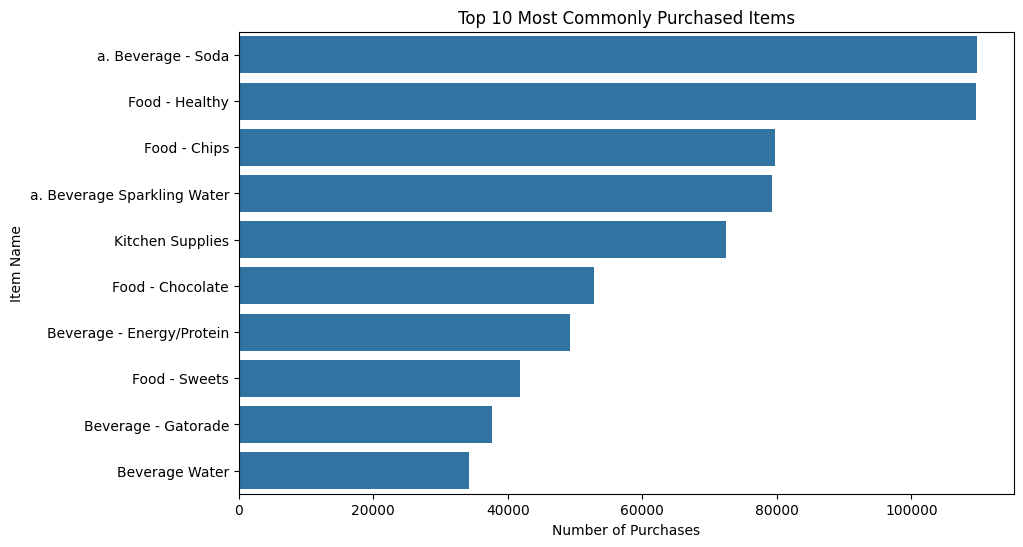

In [79]:
item_counts = final_fact['desc'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=item_counts.values, y=item_counts.index)
plt.title('Top 10 Most Commonly Purchased Items')
plt.xlabel('Number of Purchases')
plt.ylabel('Item Name')
plt.show()

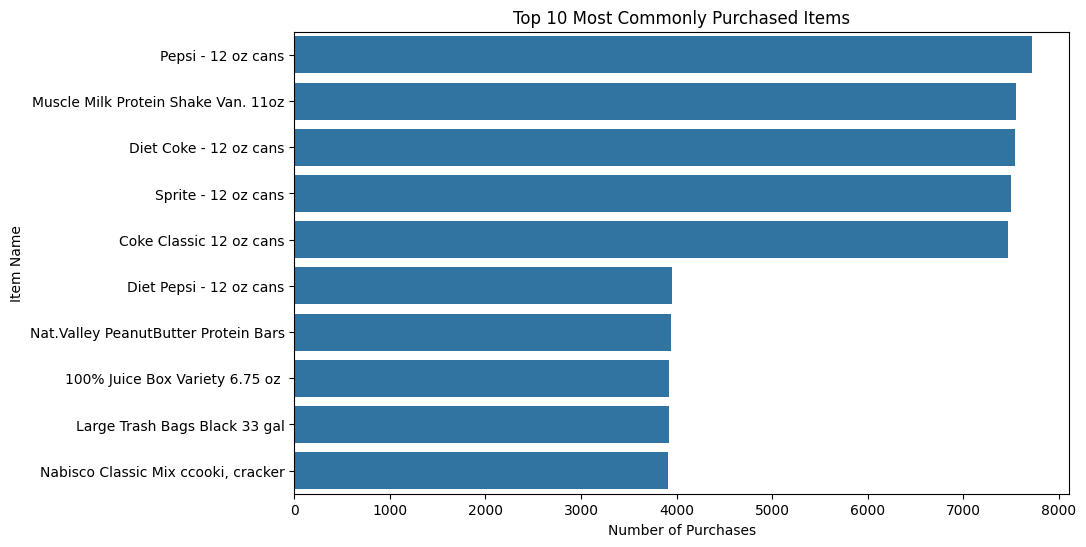

In [80]:
item_counts = final_fact['item_name'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=item_counts.values, y=item_counts.index)
plt.title('Top 10 Most Commonly Purchased Items')
plt.xlabel('Number of Purchases')
plt.ylabel('Item Name')
plt.show()

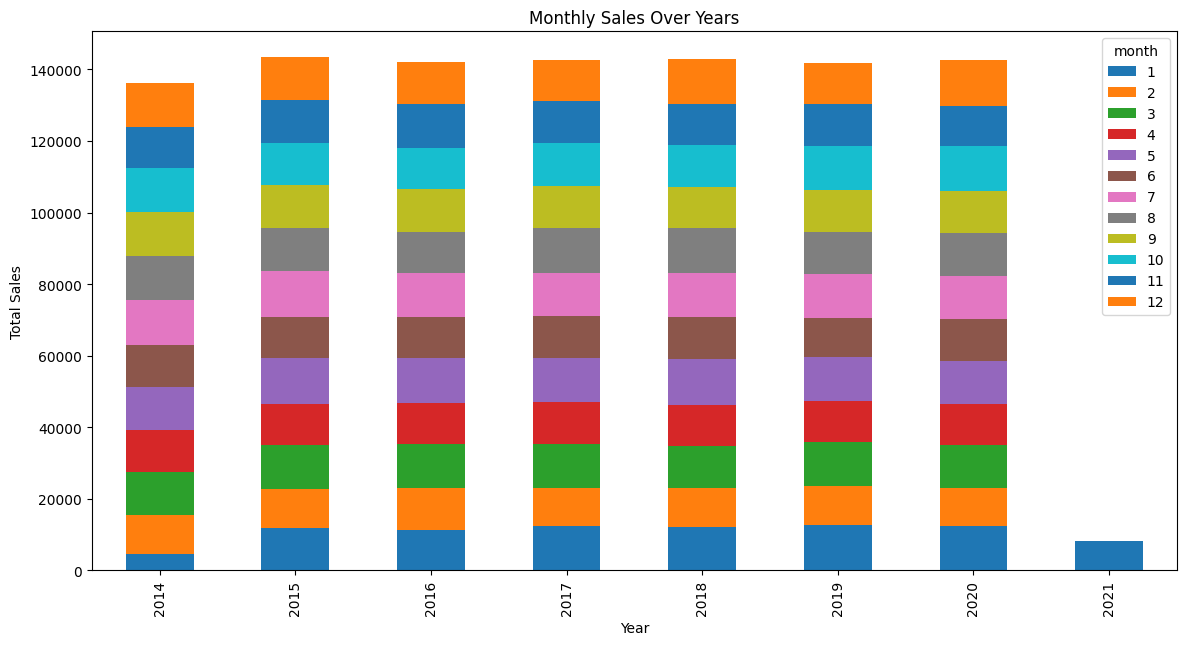

In [81]:
monthly_sales = final_fact.groupby(['year', 'month']).size()
monthly_sales.unstack().plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Monthly Sales Over Years')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.show()

In [82]:
region_summary = final_fact.groupby('division')['total_price'].agg(['count', 'mean', 'sum'])
region_summary

,count,mean,sum
division,,,
BARISAL,71444,105.262076,7520343.75
CHITTAGONG,187340,105.495863,19763595.00
DHAKA,386888,105.365428,40764619.75
KHULNA,107164,105.554202,11311610.50
RAJSHAHI,115075,105.141829,12099196.00
RANGPUR,79926,105.470516,8429836.50
SYLHET,52163,105.673260,5512234.25


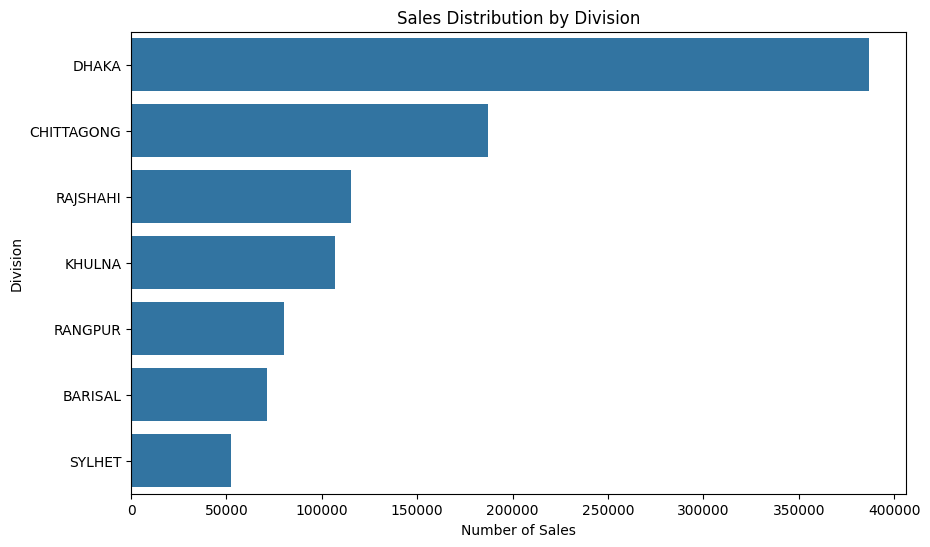

In [83]:
plt.figure(figsize=(10, 6))
sns.countplot(data=final_fact, y='division', order=final_fact['division'].value_counts().index)
plt.title('Sales Distribution by Division')
plt.xlabel('Number of Sales')
plt.ylabel('Division')
plt.show()

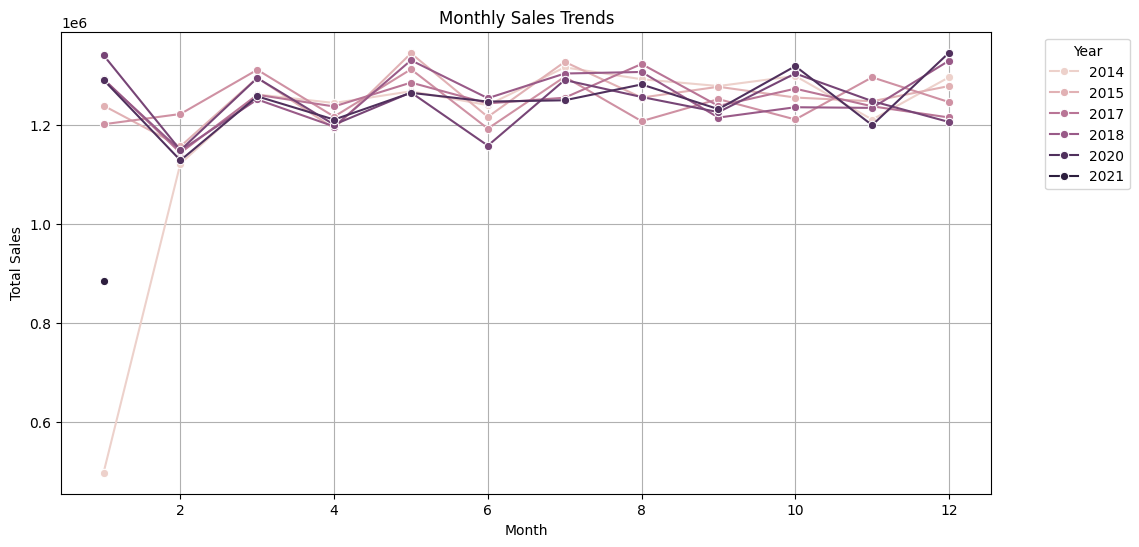

In [84]:
monthly_sales = final_fact.groupby(['year', 'month'])['total_price'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='month', y='total_price', hue='year', marker='o')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

<Axes: xlabel='hour'>

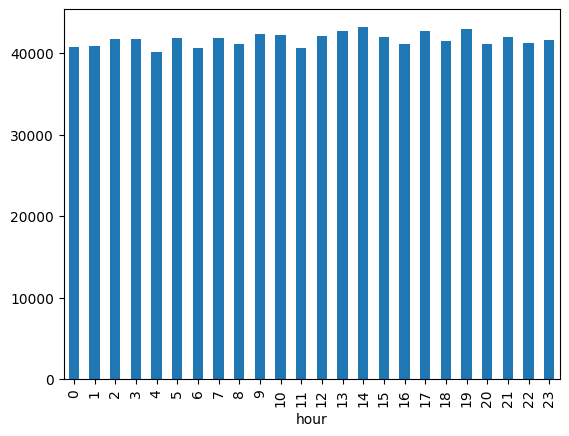

In [85]:
purchase_patterns = final_fact.groupby('hour').size()
purchase_patterns.plot(kind='bar')

In [86]:
soda_sales

,payment_key,coustomer_key,time_key,item_key,store_key,quantity,unit,unit_price,total_price,item_name,desc,division,district,hour,month,year
8,P025,C002764,T017598,I00017,S00164,11,cans,6.75,74.25,Fresca Black Cherry - 12 oz cans,a. Beverage - Soda,RAJSHAHI,SIRAJGANJ,5,10,2016
11,P030,C009139,T037206,I00023,S0032,10,cans,6.75,67.50,Pepsi - 12 oz cans,a. Beverage - Soda,SYLHET,SYLHET,16,11,2017
18,P001,C007044,T049755,I00017,S00423,7,cans,6.75,47.25,Fresca Black Cherry - 12 oz cans,a. Beverage - Soda,CHITTAGONG,CHANDPUR,14,12,2020
36,P036,C006673,T067888,I00018,S00547,1,cans,6.75,6.75,Fresca Original - 12 oz cans,a. Beverage - Soda,BARISAL,PATUAKHALI,21,11,2017
43,P028,C000794,T061460,I00003,S00604,8,cans,6.75,54.00,Barq's Root Beer - 12 oz cans,a. Beverage - Soda,DHAKA,DHAKA,21,1,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999961,P019,C003180,T044351,I00024,S00524,4,cans,16.25,65.00,Pepsi - 12 oz cans,a. Beverage - Soda,BARISAL,BARISAL,2,6,2014
999966,P021,C001543,T012000,I00024,S00200,11,cans,16.25,178.75,Pepsi - 12 oz cans,a. Beverage - Soda,KHULNA,KHULNA,13,11,2017
999968,P039,C000159,T099145,I00029,S00620,8,cans,11.50,92.00,Sunkist Orange - 12 oz cans,a. Beverage - Soda,DHAKA,DHAKA,9,6,2017
999970,P007,C008488,T067238,I00020,S00514,5,cans,6.75,33.75,Ginger Ale - 12 oz cans,a. Beverage - Soda,CHITTAGONG,RANGAMATI,13,5,2020


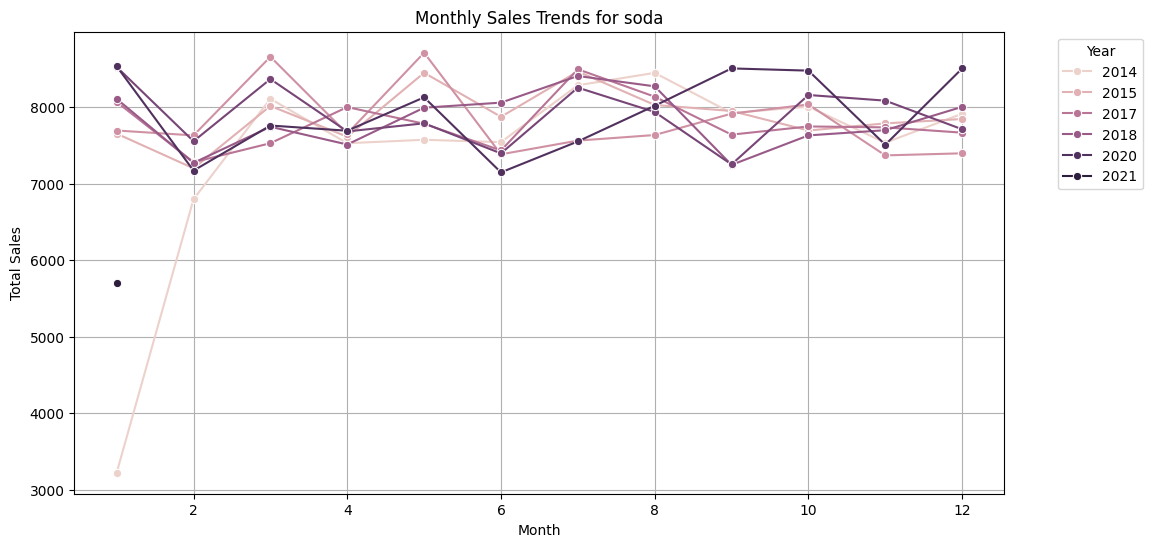

In [87]:
soda_sales = final_fact[final_fact['desc'] == 'a. Beverage - Soda']

# Group by year and month and sum the total_price
monthly_pepsi_sales = soda_sales.groupby(['year', 'month'])['quantity'].sum().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_pepsi_sales, x='month', y='quantity', hue='year', marker='o')
plt.title('Monthly Sales Trends for soda')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [88]:
final_fact['item_key'].value_counts().sort_values()

item_key
I00051    3625
I00173    3659
I00141    3665
I00068    3665
I00168    3666
          ... 
I00230    3913
I00257    3920
I00082    3923
I00203    3939
I00015    3952
Name: count, Length: 264, dtype: int64

In [89]:
final_fact['desc'].value_counts().sort_values()

desc
Beverage - Energy/Protein        3625
Coffee K-Cups Tea                3714
Coffee Stirrers                  3769
Dishware - Bowls                 7547
Medicine                         7575
Coffee Creamer                   7584
Coffee Hot Cocoa                 7585
Dishware - Utensils             11206
Dishware - Cups Cold            11369
Coffee Ground                   18901
Food - Snacks                   18942
Dishware - Plates               22538
Coffee Cream                    22702
Dishware - Cups Hot             22834
Food - Nuts                     22846
Beverage - Iced Tea             26517
Coffee K-Cups                   26671
Beverage - Juice                26865
Gum - Mints                     30237
Coffee Sweetener                30511
Beverage Water                  34173
Beverage - Gatorade             37713
Food - Sweets                   41747
Beverage - Energy/Protein       49300
Food - Chocolate                52758
Kitchen Supplies                72416
a. Beve

In [90]:
final_fact

,payment_key,coustomer_key,time_key,item_key,store_key,quantity,unit,unit_price,total_price,item_name,desc,division,district,hour,month,year,quarter
0,P026,C004510,T049189,I00177,S00307,1,ct,35.0,35.0,M&M Peanut Candy 1.7 oz,Food - Chocolate,DHAKA,JAMALPUR,17,4,2016,Q2
1,P022,C008967,T041209,I00248,S00595,1,rolls,26.0,26.0,Charmin Ultra Bath Tissue,Kitchen Supplies,DHAKA,DHAKA,19,6,2018,Q2
2,P030,C007261,T03633,I00195,S00496,8,ct,12.5,100.0,Dole Fruit in Gel Cups 4.3 oz,Food - Healthy,CHITTAGONG,NOAKHALI,8,11,2016,Q4
3,P032,C007048,T084631,I00131,S0086,8,ct,14.0,112.0,Paper Bowls 20 oz Ultra Strong,Dishware - Bowls,RANGPUR,RANGPUR,6,2,2020,Q1
4,P014,C006430,T071276,I00050,S00488,8,cans,8.0,64.0,Waterloo Sparkling Watermelon 12oz,a. Beverage Sparkling Water,CHITTAGONG,KHAGRACHHARI,2,7,2014,Q3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,P010,C003726,T09247,I00063,S00502,5,cans,40.0,200.0,Red Bull 8.4 oz,Beverage - Energy/Protein,CHITTAGONG,NOAKHALI,23,7,2020,Q3
999996,P021,C002581,T023483,I00252,S00225,1,ct,11.0,11.0,Dial Anti-bacterial Foam 7.5oz,Kitchen Supplies,KHULNA,SATKHIRA,2,1,2020,Q1
999997,P035,C006133,T039372,I00119,S00555,7,ct,53.0,371.0,K Cups Original Donut Shop Med. Roast,Coffee K-Cups,BARISAL,PIROJPUR,9,10,2017,Q4
999998,P031,C008735,T097975,I00257,S00440,2,ct,21.0,42.0,Large Trash Bags Black 33 gal,Kitchen Supplies,CHITTAGONG,CHITTAGONG,4,6,2014,Q2


In [96]:
final_fact['quarter'].value_counts()

quarter
Q3    253476
Q4    250750
Q2    248442
Q1    247332
Name: count, dtype: int64

In [95]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder

final = final_fact[['item_key','quantity','quarter','division']]
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(final[['division', 'quarter', 'item_key']])
encoded_features_df = pd.DataFrame(encoded_features.toarray(), columns=encoder.get_feature_names_out())
df_encoded = pd.concat([final.drop(['division', 'quarter', 'item_key'], axis=1), encoded_features_df], axis=1)

X = df_encoded.drop('quantity', axis=1)
y = df_encoded['quantity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

error = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {error}')


Mean Squared Error: 10.108253806965296
